In [1]:
import os
path = 'E:\\python'
os.chdir(path)
print(os.getcwd())

E:\python


In [23]:
#import statements
import pandas as pd
import numpy as np
import re 

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import pyplot as plt
%matplotlib inline


#importing the data into the notebook
train_data = pd.read_csv("train.csv")
train_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [24]:
features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING',  'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
#Feature Building
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum,'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
     #data.head()
    return data

train_data=transform_my_data(train_data)
train_data.shape
#train_data.head()

(95674, 71)

# TRAIN TEST SPLIT

In [25]:
#Data preprocesssing dropping na and splitting data into test and train
train, test = train_test_split(train_data, test_size = 0.3)
test=test.dropna()
train=train.dropna()
train_data = train
train_data.describe()
train_data.shape

(66971, 71)

In [37]:
#Data preprocesssing
#Transforming qualitative variables into quantitative
def transform(day,no):
    global train_data
    train_data=train_data.replace(day,no)
    return;
transform("Monday", 1)
transform("Tuesday", 2)
transform("Wednesday", 3)
transform("Thursday", 4)
transform("Friday", 5)
transform("Saturday", 6)
transform("Sunday", 7)

#Removing redundency in department description column
train_data=train_data.replace("MENS WEAR","MENSWEAR")

In [39]:
def transform(day,no):
    global test
    test=test.replace(day,no)
    return;
transform("Monday", 1)
transform("Tuesday", 2)
transform("Wednesday", 3)
transform("Thursday", 4)
transform("Friday", 5)
transform("Saturday", 6)
transform("Sunday", 7)

In [40]:
train_data.Weekday = train_data.Weekday.astype(float)

In [41]:
train_data.head()

,TripType,Weekday,NumItems,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
124517,9.0,3.0,2,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11469,8.0,6.0,3,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89214,7.0,5.0,2,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
189991,33.0,7.0,19,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179131,5.0,6.0,5,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
test.head()

,TripType,Weekday,NumItems,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
36538,33.0,3,11,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98975,25.0,6,3,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58710,5.0,7,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123400,40.0,3,22,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
54387,39.0,6,19,0.0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0


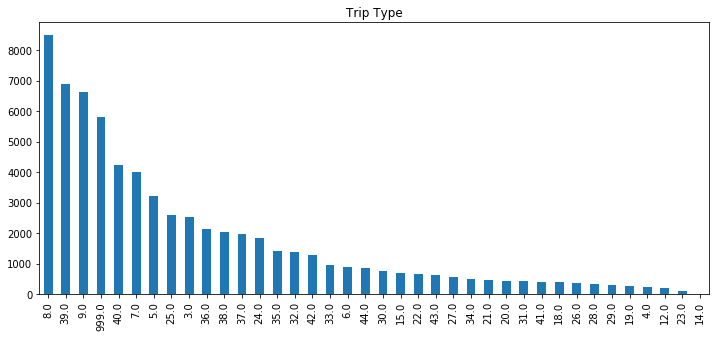

In [43]:
#ploting the histogram for the trip type 
#data_tripty = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
train_data['TripType'].value_counts().plot('bar',title="Trip Type")

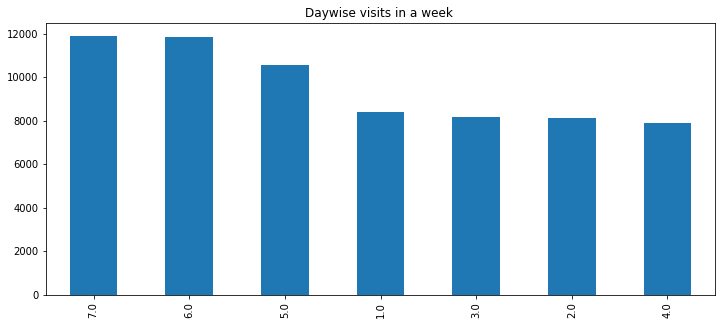

In [44]:
#ploting histogram for daywise visits
#data_tripwd = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
train_data['Weekday'].value_counts().plot('bar',title="Daywise visits in a week ")

In [45]:
train_data.T.apply(lambda x: x.nunique(),axis=1)

TripType                       38
Weekday                         7
NumItems                      136
Return                          2
1-HR PHOTO                     12
ACCESSORIES                    12
AUTOMOTIVE                     21
BAKERY                         16
BATH AND SHOWER                24
BEAUTY                         32
BEDDING                        16
BOOKS AND MAGAZINES            10
BOYS WEAR                      27
BRAS & SHAPEWEAR               15
CAMERAS AND SUPPLIES            6
CANDY, TOBACCO, COOKIES        29
CELEBRATION                    39
COMM BREAD                     19
CONCEPT STORES                  3
COOK AND DINE                  31
DAIRY                          31
DSD GROCERY                    39
ELECTRONICS                    12
FABRICS AND CRAFTS             33
FINANCIAL SERVICES             17
FROZEN FOODS                   28
FURNITURE                      12
GIRLS WEAR, 4-6X  AND 7-14     25
GROCERY DRY GOODS              60
HARDWARE      

In [46]:
#train_data_dup = train_data.drop_duplicates("VisitNumber")
def get_count(values):
    return len(values)
grouped_count = train_data.groupby(['Weekday',"TripType"]).TripType.agg(get_count)
grouped_count

Weekday  TripType
1.0      3.0          291.0
         4.0           39.0
         5.0          395.0
         6.0           90.0
         7.0          560.0
         8.0         1101.0
         9.0          727.0
         12.0          14.0
         15.0          64.0
         18.0          41.0
         19.0          27.0
         20.0          51.0
         21.0          67.0
         22.0          88.0
         23.0           6.0
         24.0         275.0
         25.0         274.0
         26.0          60.0
         27.0          56.0
         28.0          43.0
         29.0          40.0
         30.0          83.0
         31.0          42.0
         32.0         186.0
         33.0         128.0
         34.0          50.0
         35.0         193.0
         36.0         272.0
         37.0         264.0
         38.0         287.0
                      ...  
7.0      12.0          53.0
         15.0         125.0
         18.0          86.0
         19.0          50.0
  

In [55]:
#KNN classifier

knc = KNeighborsClassifier(n_neighbors=5)
knc = knc.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

predictions = knc.predict(np.asarray(test[features]))

In [56]:
#Accuracy of KNN

accuracy_score(test.TripType,predictions )

0.627425704630178

In [57]:
#pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

              precision    recall  f1-score   support

         3.0       0.78      0.89      0.83      1127
         4.0       0.08      0.04      0.05        98
         5.0       0.68      0.81      0.74      1360
         6.0       0.61      0.60      0.60       393
         7.0       0.57      0.64      0.61      1739
         8.0       0.69      0.82      0.75      3677
         9.0       0.61      0.78      0.68      2827
        12.0       0.10      0.05      0.07        81
        14.0       0.00      0.00      0.00         1
        15.0       0.44      0.37      0.40       283
        18.0       0.40      0.31      0.35       157
        19.0       0.29      0.19      0.23       110
        20.0       0.56      0.51      0.53       191
        21.0       0.57      0.56      0.57       185
        22.0       0.35      0.15      0.21       279
        23.0       0.50      0.21      0.29        34
        24.0       0.59      0.47      0.53       767
        25.0       0.45    

C:\Users\chandra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
#Logistic Regression

train_data.TripType = train_data.TripType.astype(float)

In [48]:
test.TripType = test.TripType.astype(float)

In [49]:
test.Weekday = test.Weekday.astype(float)

In [50]:
lr = LogisticRegression()
lr.fit(X = np.asarray(train_data[features]), y = np.asarray(train_data.TripType))

C:\Users\chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = lr.predict(np.asarray(test[features]))

In [52]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,6.0,7.0,8.0,9.0,12.0,15.0,18.0,19.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,44.0,999.0,All
True,,,,,,,,,,,,,,,,,,,,,
3.0,1069,4,0,0,39,0,0,0,0,0,...,0,0,0,1,0,0,1,0,7,1127
4.0,0,39,0,1,47,1,0,0,0,0,...,1,0,0,4,0,0,0,0,3,98
5.0,1,922,2,5,273,17,0,1,1,0,...,13,8,3,71,4,0,0,0,15,1360
6.0,2,2,201,3,129,1,0,2,0,0,...,2,0,0,35,0,0,0,0,7,393
7.0,0,2,7,1160,293,4,0,3,0,0,...,3,89,13,110,11,0,0,0,32,1739
8.0,0,31,18,83,3323,67,0,0,0,0,...,11,2,0,44,0,0,0,0,74,3677
9.0,17,12,1,29,274,2167,0,0,3,8,...,0,0,1,45,0,0,0,0,92,2827
12.0,0,1,1,2,7,10,1,1,1,0,...,0,5,1,27,3,0,4,0,1,81
14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
#Accuracy of logistic regression
accuracy_score(test.TripType,predictions )

0.6438699787478661

In [54]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

              precision    recall  f1-score   support

         3.0       0.75      0.95      0.84      1127
         4.0       0.00      0.00      0.00        98
         5.0       0.76      0.68      0.72      1360
         6.0       0.69      0.51      0.59       393
         7.0       0.65      0.67      0.66      1739
         8.0       0.60      0.90      0.72      3677
         9.0       0.63      0.77      0.69      2827
        12.0       0.25      0.01      0.02        81
        14.0       0.00      0.00      0.00         1
        15.0       0.57      0.32      0.41       283
        18.0       0.52      0.38      0.44       157
        19.0       0.33      0.19      0.24       110
        20.0       0.59      0.56      0.57       191
        21.0       0.69      0.51      0.59       185
        22.0       0.42      0.21      0.28       279
        23.0       0.19      0.09      0.12        34
        24.0       0.62      0.58      0.60       767
        25.0       0.69    

C:\Users\chandra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
# Decision Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))

In [59]:
#Accuracy of Decision Tree
accuracy_score(test.TripType,predictions )

0.6051980629202522

In [60]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

              precision    recall  f1-score   support

         3.0       0.79      0.94      0.86      1127
         4.0       0.04      0.02      0.03        98
         5.0       0.72      0.80      0.75      1360
         6.0       0.64      0.66      0.65       393
         7.0       0.60      0.61      0.60      1739
         8.0       0.77      0.82      0.79      3677
         9.0       0.67      0.77      0.72      2827
        12.0       0.12      0.09      0.10        81
        14.0       0.00      0.00      0.00         1
        15.0       0.38      0.35      0.37       283
        18.0       0.28      0.25      0.26       157
        19.0       0.26      0.15      0.19       110
        20.0       0.57      0.53      0.55       191
        21.0       0.56      0.41      0.47       185
        22.0       0.19      0.10      0.13       279
        23.0       0.43      0.38      0.41        34
        24.0       0.50      0.45      0.47       767
        25.0       0.42    

In [61]:
#SVM

clf = svm.SVC(decision_function_shape='ovr')
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

C:\Users\chandra\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [62]:
predictions = clf.predict(np.asarray(test[features]))

In [63]:
#Accuracy of SVM
accuracy_score(test.TripType,predictions )

0.6895098073372121

In [64]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,6.0,7.0,8.0,9.0,12.0,15.0,18.0,19.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,999.0,All
True,,,,,,,,,,,,,,,,,,,,,
3.0,1059,16,0,1,39,0,0,0,0,0,...,2,0,0,0,0,1,0,0,3,1127
4.0,0,91,0,0,0,0,0,0,1,0,...,0,0,3,0,0,0,0,0,0,98
5.0,0,1183,1,3,2,7,0,2,2,0,...,13,2,78,6,0,1,1,1,0,1360
6.0,0,5,216,1,119,1,0,2,1,0,...,1,0,28,5,0,0,0,0,0,393
7.0,0,6,13,1149,223,16,0,3,1,0,...,69,20,197,8,0,0,1,0,2,1739
8.0,0,165,41,119,3079,152,0,0,1,0,...,4,22,4,0,0,0,0,0,27,3677
9.0,17,53,12,36,142,2446,0,1,5,0,...,3,2,2,0,0,0,0,0,2,2827
12.0,0,1,1,2,0,9,2,1,4,0,...,2,2,16,5,0,2,0,0,0,81
14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [65]:
#Random Forest

walmart_rf = RandomForestClassifier(n_estimators=100)
walmart_rf = walmart_rf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = walmart_rf.predict(np.asarray(test[features]))

In [66]:
#Accuracy of Random Forest
accuracy_score(test.TripType,predictions )

0.667317005191095

In [67]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

              precision    recall  f1-score   support

         3.0       0.80      0.95      0.87      1127
         4.0       0.14      0.02      0.04        98
         5.0       0.73      0.81      0.77      1360
         6.0       0.69      0.68      0.68       393
         7.0       0.66      0.66      0.66      1739
         8.0       0.78      0.84      0.81      3677
         9.0       0.69      0.79      0.73      2827
        12.0       0.25      0.04      0.06        81
        14.0       0.00      0.00      0.00         1
        15.0       0.55      0.38      0.45       283
        18.0       0.44      0.32      0.37       157
        19.0       0.31      0.16      0.21       110
        20.0       0.65      0.59      0.62       191
        21.0       0.62      0.57      0.59       185
        22.0       0.34      0.14      0.20       279
        23.0       0.41      0.35      0.38        34
        24.0       0.58      0.56      0.57       767
        25.0       0.56    

C:\Users\chandra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
